<a href="https://colab.research.google.com/github/inschools-ng/001_BattleTank/blob/master/IE_595_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IE 595: HOMEWORK 3

1.

Fit a logistic regression model using the following dataset.

from sklearn.datasets import fetch_covtype
covertype = fetch_covtype()
X, y = covertype.data, covertype.target
Using the validation set approach, estimate the test error of this model. In order to do
this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training
observations.

iii. Obtain a prediction of default status for each observation in the
validation set by computing the posterior probability of positive
response for each observation, and classifying them each class
category if the posterior probability is greater than 0.5.

iv. Compute the validation set error, which is the fraction of the
observations in the validation set that are misclassified.
a. Repeat the process in (b) three times, using three different splits of the
observations into a training set and a validation set. Comment on the results
obtained.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,auc,accuracy_score,multilabel_confusion_matrix,precision_recall_curve,roc_curve
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler, PolynomialFeatures
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.pipeline import Pipeline



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from sklearn.datasets import fetch_covtype
covertype = fetch_covtype()
X, y = covertype.data, covertype.target


In [19]:
print(covertype.feature_names)
print()
print(covertype.target_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']

['Cover_Type']


In [20]:
def sklearn_to_df(sklearn_dataset):
  df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
  df['target'] = pd.Series(sklearn_dataset.target)
  return df

df_covtype = sklearn_to_df(datasets.fetch_covtype())
df_covtype.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [21]:
# Extract the data and target
X, y = df_covtype.drop(columns=['target']), df_covtype['target']

# Check the shape of the data and target
X.shape, y.shape

((581012, 54), (581012,))

In [22]:
# checking for missing values
assert df_covtype.isna().sum().sum() == 0

P - no of positive cases in the data.

N - no of negative cases in the data.

TP - True Positive

FP - False Positive (False Alarm, error)

TN - True Negative (Correct)

FN - False Negative (Miss, error)

TPR - True Positive Rate = TP/P

FPR = False Positve Rate = FP/N = FP/FP+TN

PPV = Positive predictive value = TP/TP+FP

NPV = TN/TN+FN = Negative predictive value

ACC = Accuracy = TP+TN/P+N = TP+TN/TP+TN+FP+FN

MCR =
Misclassification Rate = (false positive + false negative) / (total predictions) = 1 - Accuracy





In [36]:
# Split the dataset into 50% training and 50% validating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=999)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_covtype = lr.fit(X,y)
print(lr_covtype.coef_)
print("\n\n")
y_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

print("The class probabilities are: ", y_proba)
print()
print("Predicted class labels for each oservation: ", y_pred)
print()
print("Class with the highest probabilities for each : ", np.argmax(y_proba))
print()


#### Determination of the confusion matrix and the error rate
labels=['1','2','3','4','5','6','7']
cm = multilabel_confusion_matrix(y_test, y_pred,
                            labels=['1','2','3','4','5','6','7'])
print(cm)
print()
print(classification_report(y_test, y_pred, labels=labels))


tpr, fpr, ppv, npv, acc, mcr  = ([] for i in range(6))

for c in cm:
    tn = c[0,0]
    fp = c[0,1]
    fn = c[1,0]
    tp = c[1,1]
    tpr.append((tp / (tp+fn+0.)))
    fpr.append((fp / (fp+tn+0.)))
    ppv.append((tp/(tp+fp+0.)))
    npv.append((1-fn/(fn+tn+0.)))
    acc.append(((tp+tn+0.)/(tn+fp+fn+tp)))
    mcr.append(((fp+fn+0.)/(tn+fp+fn+tp)))

print('\n', '\nPR:\n', tpr, '\nFPR:\n', fpr, '\nPPV\n', ppv, '\nNPV\n', npv, '\nACC\n', acc, '\nMCR\n', mcr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 9.73493121e-03 -1.84557715e-03 -8.39232763e-02  1.33954482e-04
  -9.32671785e-03 -2.22249009e-05 -8.78675305e-02  8.49146965e-03
  -4.71644658e-02  2.31108664e-04  5.51813357e-03 -4.62748220e-04
  -5.32658058e-03 -1.05795720e-03 -3.87831534e-05 -2.24447451e-04
  -1.09377588e-04 -3.52712096e-04 -2.53542763e-05 -1.26879144e-04
  -2.70960844e-05 -1.13577831e-06  1.26500817e-04 -2.02722884e-03
  -7.23252043e-04 -2.22736687e-03 -1.46564475e-03 -8.53288804e-06
  -3.39063208e-08  9.79091578e-05 -6.89991988e-05 -4.26604364e-05
   4.55117847e-04  1.24695649e-03  3.86053165e-04  7.68015801e-03
   8.25358555e-03  4.05515580e-04 -1.25210715e-04 -2.00742271e-04
   2.44561696e-04 -1.24834442e-04 -2.94163854e-03 -1.10659167e-03
   7.57661681e-04 -2.92998189e-03  7.61263206e-04 -2.98090317e-04
  -5.84810778e-04 -4.49303538e-05 -2.53379149e-04 -2.78159126e-03
  -1.68231145e-03 -1.20081828e-03]
 [ 2.48771440e-03 -1.76427329e-03  1.64196508e-03  1.87565221e-03
  -6.54099719e-03  2.79538287e-05  2.5787

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


[[[148008  36499]
  [ 31198  74801]]

 [[103215  45658]
  [ 28989 112644]]

 [[265678   6916]
  [  6238  11674]]

 [[288875    266]
  [  1053    312]]

 [[285654      2]
  [  4850      0]]

 [[281275    634]
  [  8496    101]]

 [[279831    525]
  [  9676    474]]]



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           1       0.67      0.71      0.69    105999
           2       0.71      0.80      0.75    141633
           3       0.63      0.65      0.64     17912
           4       0.54      0.23      0.32      1365
           5       0.00      0.00      0.00      4850
           6       0.14      0.01      0.02      8597
           7       0.47      0.05      0.09     10150

   micro avg       0.69      0.69      0.69    290506
   macro avg       0.45      0.35      0.36    290506
weighted avg       0.65      0.69      0.66    290506


 
PR:
 [0.7056764686459306, 0.7953231238482557, 0.6517418490397499, 0.22857142857142856, 0.0, 0.011748284285215772, 0.046699507389162564] 
FPR:
 [0.197819052935661, 0.3066909379135236, 0.02537106466026398, 0.0009199663831832912, 7.00142829137144e-06, 0.0022489526762182123, 0.0018726190985746693] 
PPV
 [0.6720664869721473, 0.7115766067390178, 0.627972027972028, 0.5397923875432526, 0.0, 0.137414965986

In [37]:
# Split the dataset into 50% training and 50% validating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=999)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_covtype = lr.fit(X,y)
print(lr_covtype.coef_)
print("\n\n")
y_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

print("The class probabilities are: ", y_proba)
print()
print("Predicted class labels for each oservation: ", y_pred)
print()
print("Class with the highest probabilities for each : ", np.argmax(y_proba))
print()


#### Determination of the confusion matrix and the error rate
labels=['1','2','3','4','5','6','7']
cm = multilabel_confusion_matrix(y_test, y_pred,
                            labels=['1','2','3','4','5','6','7'])
print(cm)
print()
print(classification_report(y_test, y_pred, labels=labels))


tpr, fpr, ppv, npv, acc, mcr  = ([] for i in range(6))

for c in cm:
    tn = c[0,0]
    fp = c[0,1]
    fn = c[1,0]
    tp = c[1,1]
    tpr.append((tp / (tp+fn+0.)))
    fpr.append((fp / (fp+tn+0.)))
    ppv.append((tp/(tp+fp+0.)))
    npv.append((1-fn/(fn+tn+0.)))
    acc.append(((tp+tn+0.)/(tn+fp+fn+tp)))
    mcr.append(((fp+fn+0.)/(tn+fp+fn+tp)))

print('\n', '\nPR:\n', tpr, '\nFPR:\n', fpr, '\nPPV\n', ppv, '\nNPV\n', npv, '\nACC\n', acc, '\nMCR\n', mcr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 9.73493121e-03 -1.84557715e-03 -8.39232763e-02  1.33954482e-04
  -9.32671785e-03 -2.22249009e-05 -8.78675305e-02  8.49146965e-03
  -4.71644658e-02  2.31108664e-04  5.51813357e-03 -4.62748220e-04
  -5.32658058e-03 -1.05795720e-03 -3.87831534e-05 -2.24447451e-04
  -1.09377588e-04 -3.52712096e-04 -2.53542763e-05 -1.26879144e-04
  -2.70960844e-05 -1.13577831e-06  1.26500817e-04 -2.02722884e-03
  -7.23252043e-04 -2.22736687e-03 -1.46564475e-03 -8.53288804e-06
  -3.39063208e-08  9.79091578e-05 -6.89991988e-05 -4.26604364e-05
   4.55117847e-04  1.24695649e-03  3.86053165e-04  7.68015801e-03
   8.25358555e-03  4.05515580e-04 -1.25210715e-04 -2.00742271e-04
   2.44561696e-04 -1.24834442e-04 -2.94163854e-03 -1.10659167e-03
   7.57661681e-04 -2.92998189e-03  7.61263206e-04 -2.98090317e-04
  -5.84810778e-04 -4.49303538e-05 -2.53379149e-04 -2.78159126e-03
  -1.68231145e-03 -1.20081828e-03]
 [ 2.48771440e-03 -1.76427329e-03  1.64196508e-03  1.87565221e-03
  -6.54099719e-03  2.79538287e-05  2.5787

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


[[[236485  58692]
  [ 50073 119560]]

 [[165077  73004]
  [ 46551 180178]]

 [[425140  11169]
  [  9979  18522]]

 [[462204    423]
  [  1710    473]]

 [[457229      2]
  [  7579      0]]

 [[449960   1020]
  [ 13655    175]]

 [[447601    854]
  [ 15617    738]]]



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           1       0.67      0.70      0.69    169633
           2       0.71      0.79      0.75    226729
           3       0.62      0.65      0.64     28501
           4       0.53      0.22      0.31      2183
           5       0.00      0.00      0.00      7579
           6       0.15      0.01      0.02     13830
           7       0.46      0.05      0.08     16355

   micro avg       0.69      0.69      0.69    464810
   macro avg       0.45      0.35      0.36    464810
weighted avg       0.65      0.69      0.66    464810


 
PR:
 [0.7048156903432705, 0.794684402965655, 0.6498719343180941, 0.21667430142006414, 0.0, 0.012653651482284888, 0.045123815346988685] 
FPR:
 [0.1988366302252547, 0.30663513678117954, 0.02559883018686298, 0.0009143435208061786, 4.374156607929034e-06, 0.0022617410971661716, 0.0019043159291344729] 
PPV
 [0.6707358122209007, 0.7116540670347813, 0.6238254016368596, 0.5279017857142857, 0.0, 0.146443514

In [38]:
# Split the dataset into 50% training and 50% validating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=999)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_covtype = lr.fit(X,y)
print(lr_covtype.coef_)
print("\n\n")
y_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

print("The class probabilities are: ", y_proba)
print()
print("Predicted class labels for each oservation: ", y_pred)
print()
print("Class with the highest probabilities for each : ", np.argmax(y_proba))
print()


#### Determination of the confusion matrix and the error rate
labels=['1','2','3','4','5','6','7']
cm = multilabel_confusion_matrix(y_test, y_pred,
                            labels=['1','2','3','4','5','6','7'])
print(cm)
print()
print(classification_report(y_test, y_pred, labels=labels))


tpr, fpr, ppv, npv, acc, mcr  = ([] for i in range(6))

for c in cm:
    tn = c[0,0]
    fp = c[0,1]
    fn = c[1,0]
    tp = c[1,1]
    tpr.append((tp / (tp+fn+0.)))
    fpr.append((fp / (fp+tn+0.)))
    ppv.append((tp/(tp+fp+0.)))
    npv.append((1-fn/(fn+tn+0.)))
    acc.append(((tp+tn+0.)/(tn+fp+fn+tp)))
    mcr.append(((fp+fn+0.)/(tn+fp+fn+tp)))

print('\n', '\nPR:\n', tpr, '\nFPR:\n', fpr, '\nPPV\n', ppv, '\nNPV\n', npv, '\nACC\n', acc, '\nMCR\n', mcr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 9.73493121e-03 -1.84557715e-03 -8.39232763e-02  1.33954482e-04
  -9.32671785e-03 -2.22249009e-05 -8.78675305e-02  8.49146965e-03
  -4.71644658e-02  2.31108664e-04  5.51813357e-03 -4.62748220e-04
  -5.32658058e-03 -1.05795720e-03 -3.87831534e-05 -2.24447451e-04
  -1.09377588e-04 -3.52712096e-04 -2.53542763e-05 -1.26879144e-04
  -2.70960844e-05 -1.13577831e-06  1.26500817e-04 -2.02722884e-03
  -7.23252043e-04 -2.22736687e-03 -1.46564475e-03 -8.53288804e-06
  -3.39063208e-08  9.79091578e-05 -6.89991988e-05 -4.26604364e-05
   4.55117847e-04  1.24695649e-03  3.86053165e-04  7.68015801e-03
   8.25358555e-03  4.05515580e-04 -1.25210715e-04 -2.00742271e-04
   2.44561696e-04 -1.24834442e-04 -2.94163854e-03 -1.10659167e-03
   7.57661681e-04 -2.92998189e-03  7.61263206e-04 -2.98090317e-04
  -5.84810778e-04 -4.49303538e-05 -2.53379149e-04 -2.78159126e-03
  -1.68231145e-03 -1.20081828e-03]
 [ 2.48771440e-03 -1.76427329e-03  1.64196508e-03  1.87565221e-03
  -6.54099719e-03  2.79538287e-05  2.5787

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


[[[265960  66241]
  [ 56316 134394]]

 [[185701  82176]
  [ 52528 202506]]

 [[478188  12584]
  [ 11300  20839]]

 [[519960    474]
  [  1942    535]]

 [[514398      3]
  [  8510      0]]

 [[506178   1151]
  [ 15379    203]]

 [[503476    976]
  [ 17630    829]]]



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           1       0.67      0.70      0.69    190710
           2       0.71      0.79      0.75    255034
           3       0.62      0.65      0.64     32139
           4       0.53      0.22      0.31      2477
           5       0.00      0.00      0.00      8510
           6       0.15      0.01      0.02     15582
           7       0.46      0.04      0.08     18459

   micro avg       0.69      0.69      0.69    522911
   macro avg       0.45      0.35      0.36    522911
weighted avg       0.65      0.69      0.66    522911


 
PR:
 [0.7047034764826176, 0.7940353050965754, 0.6484022527147703, 0.21598708114654824, 0.0, 0.01302785265049416, 0.04491034183866948] 
FPR:
 [0.19940036303322387, 0.30676765829093205, 0.025641234626262298, 0.0009107783119473362, 5.8320259875078e-06, 0.002268744739606843, 0.001934772783138931] 
PPV
 [0.6698432476885887, 0.7113410753050773, 0.6234928043562816, 0.5302279484638256, 0.0, 0.149926144756

### In all three times we repeated the process with different splits, the error of the misclassified set did not change significantly and therefore the model is very stable and robust. The model is not very sensitive to variations in the training set, is generalizing well and not overfitting(caused by high variance).




QUESTION 2


2. We will now perform cross-validation on a simulated data set.
a. Generate a simulated data set as follows:
set the random state to seed (1)
y= np.random.normal(0,1,100)
x= np.random.normal(0,1,100)
y=x-2* x^2+ np.random.normal(0,1,100)
In this data set, what is n and what is p? Write out the model used to generate the data
in equation form.
b. Create a scatterplot of X against Y. Comment on what you find.
c. Set a random seed, and then compute the LOOCV errors that result from
fitting the following four models using least squares:
I. 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝜖
II. 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝛽2𝑋2 + 𝜖
III. 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝛽2𝑋2 + 𝛽3𝑋3 + 𝜖
IV. 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝛽2𝑋2 + 𝛽3𝑋3 + 𝛽4𝑋4 + 𝜖
Note you may find it helpful to use the DataFrame function to create a single
data set containing both X and Y.
d. Repeat (c) using another random seed, and report your results.

In [ ]:
np.random.seed(1)
y=np.random.normal(size=100)
x=np.random.normal(size=100)
epsilon = np.random.normal(size=100)
y=((x-2*x**2)+epsilon)

# a.

## n = number of obs = 100
## p= number of predictors = 2

## The model in the equation form = Y = B0 + B1(X^2) + E

> where B0 = 0 and B1 = -2 and E = Error

Text(0, 0.5, 'y')

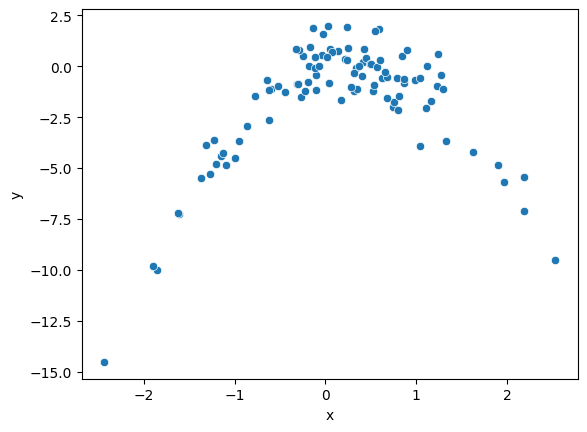

In [17]:
ax = sn.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')

#b.

This relationship of the predictors x and the response y is non-linear and quadratic. The model displays negative concavity one maxima/minima (features of 2nd order polynomials ).




In [9]:
#mean square error calculation
def mse(y_pred, y):
  return np.sum(np.square(y_pred - y))/y.size

#loocv with simulated data on random seed
def sim_loocv(seed):
  np.random.seed(seed)
  mu, sigma = 0, 1 #representing the mean and the standard deviation
  x = np.random.normal(mu, sigma, 100)
  y = ((x-2*x**2)) + np.random.normal(mu, sigma, 100)
  sim_df = pd.DataFrame({'x': x, 'y' : y})

  formula_ = {   'x'   : 'y ~ x',
                'x^2' : 'y ~ x + np.power(x, 2)',
                'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
                'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

  errors = {}

  for j in formula_:
    y_pred = pd.Series({}) # store a state of the predictions
    for i in range(sim_df.shape[0]):
      train = sim_df.index != i # create an index for the LOOCV

      # Linear regression with the least squares
      model_ols = smf.ols(formula=formula_[j], data=sim_df[train]).fit()

      # prediction
      y_hat = model_ols.predict(exog=sim_df[~train])
      y_pred = pd.concat([y_pred, y_hat])

    errors[j] = mse(np.array(y_pred), y)
  print("\n\n")
  print("Values of MSE:\n", errors)
  print()

# print function
#sim_loocv(0)
sim_loocv(1)
#sim_loocv(7)
#sim_loocv(14)
sim_loocv(999)

<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a s




Values of MSE:
 {'x': 6.260764331604616, 'x^2': 0.9142897072803657, 'x^3': 0.9268768781648798, 'x^4': 0.8669116865881086}



<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-9-882ce4c0049f>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a s




Values of MSE:
 {'x': 6.372768922772553, 'x^2': 0.9130054396076762, 'x^3': 0.905864629938678, 'x^4': 0.997998233244167}



##2d.

###There is a significant difference in the computed error between the two seeds used to simulate the observations.
###Thie significant difference is due to the variance caused by the differences between the two sets of observations derived from the two different seeds.   

##2e

###The model iii with the third order (x^3) included shows the least error for a random seed of 1 and alternates to model iv with a random seed of 999.
###I expected model ii to have the smallest LOOCV error because y takes the same form as model ii.
###This may suggest that y can indeed be rewritten to take the form of model iii.
###in this case we can have y = -2(x^2)+(x^3)+E


In [14]:
np.random.seed(999)
#define the mean and standard deviation
mu,sigma = 0,1
x = np.random.normal(mu, sigma, 100)
y = ((x-2*x**2))+np.random.normal(mu,sigma,100)
df_simulated = pd.DataFrame({'x': x, 'y':y})


formula_ = {   'x'   : 'y ~ x',
                'x^2' : 'y ~ x + np.power(x, 2)',
                'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
                'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

errors = {}

for j in formula_:
  y_pred = pd.Series({}) # store a state of the predictions
  for i in range(df_simulated.shape[0]):
    train = df_simulated.index != i # create an index for the LOOCV

    # Linear regression with the least squares
    model_ols = smf.ols(formula=formula_[j], data=df_simulated[train]).fit()

    # prediction
    y_hat = model_ols.predict(exog=df_simulated[~train])
    y_pred = pd.concat([y_pred, y_hat])

  errors[j] = mse(np.array(y_pred), y)

print(model_ols.summary())

<ipython-input-14-0efc4dc65a6b>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-14-0efc4dc65a6b>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-14-0efc4dc65a6b>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store a state of the predictions
<ipython-input-14-0efc4dc65a6b>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({}) # store

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     143.9
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           3.51e-39
Time:                        15:18:55   Log-Likelihood:                -131.63
No. Observations:                  99   AIC:                             273.3
Df Residuals:                      94   BIC:                             286.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0259      0.142     -0.

#2f

##From the cross-validation results above, we observed that the model iv and iii with x^4 and x^3 included gave the least error.

## USing the OLS (Least Squares) method, we can also support the conclusion from the cross validation results sthat the models iii and iv perform best.

##We can say this because the feature-wise t-statistics for the models show that p < 0.05 for features x^0, x^2, x^3 and x^4.